In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import sklearn

In [2]:
u_1 = np.array([2, 2])
u_2 = np.array([-5, -3])

In [3]:
cov_1 = np.array([[0.5, 2], [1, 1]])
cov_2 = np.array([[1.5, 2], [2, 1]])

In [4]:
d1 = np.random.multivariate_normal(u_1, cov_1, 500) # cat
d2 = np.random.multivariate_normal(u_2, cov_2, 500) # dog

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9480\1953260279.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  d1 = np.random.multivariate_normal(u_1, cov_1, 500) # cat
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9480\1953260279.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  d2 = np.random.multivariate_normal(u_2, cov_2, 500) # dog


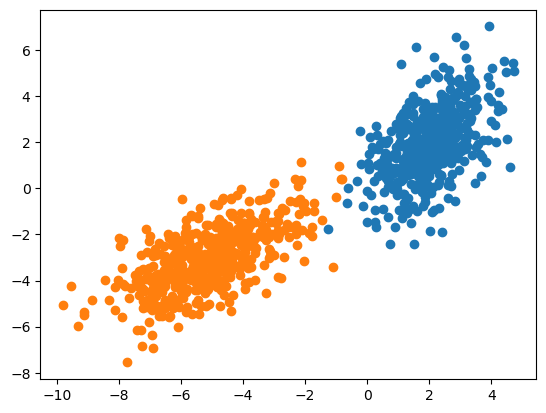

In [5]:
plt.scatter(d1[:,0], d1[:, 1])
plt.scatter(d2[:, 0], d2[:, 1])

In [6]:
dataset = np.ones((1000, 4))

In [7]:
d1.shape

(500, 2)

In [8]:
dataset[:4]

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [9]:
dataset[:500, 1:3] = d1

In [10]:
dataset[500:, 1:3] = d2

In [11]:
dataset[:500,-1] = 0

In [12]:
dataset[:4]

array([[1.        , 1.08237942, 3.13414214, 0.        ],
       [1.        , 3.32642052, 3.73630791, 0.        ],
       [1.        , 1.1266789 , 2.58975514, 0.        ],
       [1.        , 1.76816966, 1.09254968, 0.        ]])

In [13]:
dataset[-4:]

array([[ 1.        , -3.67775683, -2.11935368,  1.        ],
       [ 1.        , -5.81564846, -2.14030639,  1.        ],
       [ 1.        , -5.98752744, -4.74252631,  1.        ],
       [ 1.        , -0.84476637,  0.38751886,  1.        ]])

In [14]:
np.random.shuffle(dataset)

In [15]:
dataset[:4]

array([[ 1.        ,  1.27071507,  2.79797026,  0.        ],
       [ 1.        , -6.4730023 , -3.83549361,  1.        ],
       [ 1.        , -4.87953625, -2.48959371,  1.        ],
       [ 1.        ,  1.4456642 ,  0.8276828 ,  0.        ]])

In [16]:
dataset.shape

(1000, 4)

In [17]:
x_train = dataset[:800, :-1]
y_train = dataset[:800, -1 ]
x_test = dataset[800:, :-1]
y_test = dataset[800:, -1]

In [18]:
print(x_train.shape, y_train.shape, y_test.shape, x_test.shape)

(800, 3) (800,) (200,) (200, 3)


In [19]:
y_train = y_train.reshape((-1, 1))

In [20]:
print(y_train.shape)

(800, 1)


In [21]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [22]:
def hypothesis(X, theta):
    return 1/(1 + np.exp(-(np.dot(X, theta))))
    
# def hypothesis(X, theta):
#     return sigmoid(np.dot(X, theta))

In [23]:
def cost(X, Y, theta):
    
    y_p = hypothesis(X, theta)
    
    loss = -1*(np.mean(Y*np.log(y_p) + (1- Y)*np.log(1 - y_p)))
    
    return loss

In [24]:
def gradient(X, Y, theta):
    
    y_p = hypothesis(X, theta)
    
    grad = np.dot(X.T , (Y - y_p))
    
    return grad/X.shape[0]

In [25]:
def gradient_descent(X, Y, learning_rate = 0.3, epochs = 100):
    
    m,n = X.shape
    
    theta = np.zeros((n , 1))
    print(theta.shape)
    cost_epoch = []
    
    for i in range(epochs):
        
        print('The algo is on epoch no : ',i, end = '\r')
        
        loss = cost(X, Y, theta)
        
        grad = gradient(X, Y, theta)
        
        cost_epoch.append(loss)
        
        theta = theta + learning_rate*grad
        
    print(grad.shape, theta.shape)
    return theta, cost_epoch    


In [26]:
theta, cost = gradient_descent(x_train, y_train, learning_rate=0.003,epochs = 1000)

(3, 1)


(3, 1) (3, 1)


In [27]:
theta

array([[-0.17423545],
       [-0.7703364 ],
       [-0.5058429 ]])

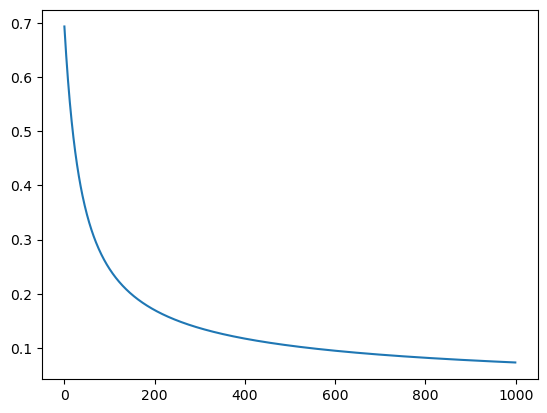

In [28]:
plt.plot(cost)

In [29]:
y_test = y_test.reshape((-1, 1))

In [30]:
y_test.shape

(200, 1)

In [31]:
def predict(X, theta):
    
    y_p = hypothesis(X, theta)
    
    y_pred = []

    for i in y_p:
        
        if i >= 0.5:
            y_pred.append(1)
            
        else:
            y_pred.append(0)
    y_pred = np.array(y_pred)        
    
    return y_pred

In [32]:
pred = predict(x_test, theta)

In [33]:
pred = pred.reshape((-1, 1))

In [34]:
pred.shape

(200, 1)

In [35]:
def accuracy(pred, label):
    
    temp = 0
    
    for i in range(pred.shape[0]):
        if pred[i]==label[i]:
            
            temp += 1
        else:
            pass
    print("Accuracy = ", (temp/pred.shape[0])*100, "%")    

In [36]:
accuracy(pred, y_test)

Accuracy =  99.0 %


In [37]:
predict(([-1, -3, 2]), theta)

array([1])

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
data = pd.DataFrame(dataset)

x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:,-1], test_size=0.2, random_state=43)

In [39]:
model = LogisticRegression()
model

LogisticRegression()

In [40]:
model.fit(x_train, y_train)

LogisticRegression()

In [41]:
pred = model.predict(x_test)

In [42]:
print((f1_score(y_test, pred))*100, "%")

98.55072463768116 %


In [43]:
model.predict([[-1, -3, 2]])

array([1.])